# Mosquito Data Analysis
### 데이터 선정 이유
---
날씨(기온, 강수량, 습도)에 따라 모기의 활동 지수 증가와 감소를 일으키는 요인이 무엇인지 분석하기 위해서 해당 데이터를 선정하였다.
<br/><br/>

> **데이터 출처**<br/>
- [모기활동지수 데이터](https://news.seoul.go.kr/welfare/mosquito)<br/>
- [날씨(기온, 강수량, 습도) 데이터](https://data.kma.go.kr/climate/RankState/selectRankStatisticsDivisionList.do)


### 모기 데이터전처리

In [128]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/mosquito/2016.csv', encoding='euc-kr')
df2 = pd.read_csv('/content/drive/MyDrive/mosquito/2017.csv', encoding='euc-kr')
df3 = pd.read_csv('/content/drive/MyDrive/mosquito/2018.csv', encoding='euc-kr')
df4 = pd.read_csv('/content/drive/MyDrive/mosquito/2019.csv', encoding='euc-kr')
df5 = pd.read_csv('/content/drive/MyDrive/mosquito/2020.csv', encoding='euc-kr')
df6 = pd.read_csv('/content/drive/MyDrive/mosquito/2021.csv', encoding='euc-kr')
df7 = pd.read_csv('/content/drive/MyDrive/mosquito/2022.csv', encoding='euc-kr')

df = pd.concat([df1, df2, df3, df4, df5, df6, df7])
df = df.reset_index(drop=True)
df

,날짜,모기 활동 지수,모기 발생 단계
0,2016년 5월 1일 (일),254.4,2단계 (관심) (하)
1,2016년 5월 2일 (월),273.5,2단계 (관심) (하)
2,2016년 5월 3일 (화),304.0,2단계 (관심) (하)
3,2016년 5월 4일 (수),256.2,2단계 (관심) (하)
4,2016년 5월 5일 (목),243.8,1단계 (쾌적) (상)
...,...,...,...
2216,2022년 5월 16일 (월),40.9,2단계 (관심) (중)
2217,2022년 5월 17일 (화),36.2,2단계 (관심) (하)
2218,2022년 5월 18일 (수),37.5,2단계 (관심) (하)
2219,2022년 5월 19일 (목),44.6,2단계 (관심) (중)


In [129]:
df['Year'] = df['날짜'].str.split(" ", expand=True)[0]
df['Month'] = df['날짜'].str.split(" ", expand=True)[1]
df['Day'] = df['날짜'].str.split(" ", expand=True)[2]

df['Year'] = df['Year'].str[:-1]
df['Month'] = df['Month'].str[:-1]
df['Day'] = df['Day'].str[:-1]

df['date'] = df['Year'] + df['Month'] + df['Day']
df

,날짜,모기 활동 지수,모기 발생 단계,Year,Month,Day,date
0,2016년 5월 1일 (일),254.4,2단계 (관심) (하),2016,5,1,201651
1,2016년 5월 2일 (월),273.5,2단계 (관심) (하),2016,5,2,201652
2,2016년 5월 3일 (화),304.0,2단계 (관심) (하),2016,5,3,201653
3,2016년 5월 4일 (수),256.2,2단계 (관심) (하),2016,5,4,201654
4,2016년 5월 5일 (목),243.8,1단계 (쾌적) (상),2016,5,5,201655
...,...,...,...,...,...,...,...
2216,2022년 5월 16일 (월),40.9,2단계 (관심) (중),2022,5,16,2022516
2217,2022년 5월 17일 (화),36.2,2단계 (관심) (하),2022,5,17,2022517
2218,2022년 5월 18일 (수),37.5,2단계 (관심) (하),2022,5,18,2022518
2219,2022년 5월 19일 (목),44.6,2단계 (관심) (중),2022,5,19,2022519


In [130]:
from datetime import datetime

df['date']= df['date'].apply(lambda x: datetime.strptime(x, '%Y%m%d'))
df = df[['date', '모기 활동 지수']]
df = df[:-1]
df

,date,모기 활동 지수
0,2016-05-01,254.4
1,2016-05-02,273.5
2,2016-05-03,304.0
3,2016-05-04,256.2
4,2016-05-05,243.8
...,...,...
2215,2022-05-15,51.3
2216,2022-05-16,40.9
2217,2022-05-17,36.2
2218,2022-05-18,37.5


In [131]:
df['date'] = df['date'].astype(str)
df

,date,모기 활동 지수
0,2016-05-01,254.4
1,2016-05-02,273.5
2,2016-05-03,304.0
3,2016-05-04,256.2
4,2016-05-05,243.8
...,...,...
2215,2022-05-15,51.3
2216,2022-05-16,40.9
2217,2022-05-17,36.2
2218,2022-05-18,37.5


### 기온, 강수량, 습도 데이터전처리

In [132]:
temperature = pd.read_csv('/content/drive/MyDrive/mosquito/temperature.csv', encoding='euc-kr')
rain = pd.read_csv('/content/drive/MyDrive/mosquito/rain.csv', encoding='euc-kr')
humidity = pd.read_csv('/content/drive/MyDrive/mosquito/humidity.csv', encoding='euc-kr')
temperature

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각일교차,Unnamed: 8
0,\t\t108,서울,2016-01-01,1.2,4.0,14:42,-3.3,4:56,7.3
1,\t\t108,서울,2016-01-02,5.7,9.5,15:14,1.0,7:44,8.5
2,\t\t108,서울,2016-01-03,6.5,9.4,15:06,5.1,23:59,4.3
3,\t\t108,서울,2016-01-04,2.0,5.3,13:13,-2.5,23:50,7.8
4,\t\t108,서울,2016-01-05,-2.7,1.5,15:12,-4.8,8:44,6.3
...,...,...,...,...,...,...,...,...,...
2345,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2346,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2347,\t\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2348,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
# temperature 데이터전처리
temperature = temperature.drop(['\t\t지점번호', '지점명', '\t최고기온시각','최저기온시각일교차','Unnamed: 8'], axis=1)
temperature = temperature.drop_duplicates()
temperature = temperature[:-1]
temperature = temperature.set_index('일시')

temperature

,평균기온(℃),최고기온(℃),최저기온(℃)
일시,,,
2016-01-01,1.2,4.0,-3.3
2016-01-02,5.7,9.5,1.0
2016-01-03,6.5,9.4,5.1
2016-01-04,2.0,5.3,-2.5
2016-01-05,-2.7,1.5,-4.8
...,...,...,...
2022-05-15,16.2,22.4,10.5
2022-05-16,17.3,23.7,10.9
2022-05-17,20.0,27.4,13.0


In [134]:
# rain 데이터전처리
rain = rain.drop(['\t지점번호', '지점명', '1시간최다강수량(mm)','1시간최다강수량시각'], axis=1)
rain = rain.drop_duplicates()
rain = rain[:-1]
rain = rain.set_index('일시')

rain

,강수량(mm)
일시,
2016-01-01,NaN
2016-01-02,NaN
2016-01-03,NaN
2016-01-04,NaN
2016-01-05,NaN
...,...
2022-05-15,NaN
2022-05-16,NaN
2022-05-17,NaN


In [135]:
# humidity 데이터전처리
humidity = humidity.drop(['\t\t지점번호', '지점명'], axis=1)
humidity = humidity.drop_duplicates()
humidity = humidity[:-1]
humidity = humidity.set_index('일시')

humidity

,평균습도(%rh),최저습도(%rh)
일시,,
2016-01-01,73.0,56.0
2016-01-02,76.9,62.0
2016-01-03,80.6,61.0
2016-01-04,54.4,28.0
2016-01-05,39.4,22.0
...,...,...
2022-05-15,39.8,24.0
2022-05-16,56.3,36.0
2022-05-17,60.1,36.0


In [136]:
# 기온, 강수량, 습도 데이터 합치기
weather = temperature.join(rain)
weather = weather.join(humidity)
weather = weather.reset_index()

weather

,일시,평균기온(℃),최고기온(℃),최저기온(℃),강수량(mm),평균습도(%rh),최저습도(%rh)
0,2016-01-01,1.2,4.0,-3.3,NaN,73.0,56.0
1,2016-01-02,5.7,9.5,1.0,NaN,76.9,62.0
2,2016-01-03,6.5,9.4,5.1,NaN,80.6,61.0
3,2016-01-04,2.0,5.3,-2.5,NaN,54.4,28.0
4,2016-01-05,-2.7,1.5,-4.8,NaN,39.4,22.0
...,...,...,...,...,...,...,...
2326,2022-05-15,16.2,22.4,10.5,NaN,39.8,24.0
2327,2022-05-16,17.3,23.7,10.9,NaN,56.3,36.0
2328,2022-05-17,20.0,27.4,13.0,NaN,60.1,36.0
2329,2022-05-18,20.0,25.4,15.7,1.5,59.4,39.0


In [137]:
weather = weather[weather['일시'] >= '2016-05-01']
weather = weather.reset_index(drop=True)

weather

,일시,평균기온(℃),최고기온(℃),최저기온(℃),강수량(mm),평균습도(%rh),최저습도(%rh)
0,2016-05-01,18.8,26.0,12.2,NaN,40.5,16.0
1,2016-05-02,21.1,28.4,16.5,16.5,64.5,33.0
2,2016-05-03,12.9,17.6,8.9,27.0,86.1,72.0
3,2016-05-04,15.7,20.6,10.2,NaN,46.6,28.0
4,2016-05-05,18.9,26.9,10.2,7.5,50.8,17.0
...,...,...,...,...,...,...,...
2205,2022-05-15,16.2,22.4,10.5,NaN,39.8,24.0
2206,2022-05-16,17.3,23.7,10.9,NaN,56.3,36.0
2207,2022-05-17,20.0,27.4,13.0,NaN,60.1,36.0
2208,2022-05-18,20.0,25.4,15.7,1.5,59.4,39.0


## 시작하기 전에
날씨에 따라 모기 활동 지수를 예측하는 **회귀 모델**로 접근하고자 함
<br/><br/>
### 🥸 프로젝트의 가설을 세워보자!
1. 온도가 높을 수록 모기 활동 지수가 높을 것이다.
2. 습도가 높을 수록 모기 활동 지수가 높을 것이다.
3. 강수량이 많을 수록 모기 활동 지수가 높을 것이다.


### 최종 데이터셋
- `date` : 일시(측정 날짜)
- `mean_T` : 평균기온(℃)
- `max_T` : 최고기온(℃)
- `min_T` : 최저기온(℃)
- `rain` : 강수량(mm)
- `mean_H` : 평균습도(%rh)
- `min_H` : 최저습도(%rh)
- `mosquito` : 모기 활동 지수


In [138]:
# 최종 데이터셋(mosquito)
mosquito = pd.merge(weather, df, left_on='일시', right_on='date')
mosquito = mosquito.drop(['date'], axis=1)
mosquito.head()

,일시,평균기온(℃),최고기온(℃),최저기온(℃),강수량(mm),평균습도(%rh),최저습도(%rh),모기 활동 지수
0,2016-05-01,18.8,26.0,12.2,NaN,40.5,16.0,254.4
1,2016-05-02,21.1,28.4,16.5,16.5,64.5,33.0,273.5
2,2016-05-03,12.9,17.6,8.9,27.0,86.1,72.0,304.0
3,2016-05-04,15.7,20.6,10.2,NaN,46.6,28.0,256.2
4,2016-05-05,18.9,26.9,10.2,7.5,50.8,17.0,243.8


In [139]:
def col_rename(X):
    X = X.copy()
    # 칼럼 이름 변경
    X = X.rename(columns = {'일시': 'date', 
                            '평균기온(℃)': 'mean_T', 
                            '최고기온(℃)': 'max_T', 
                            '최저기온(℃)': 'min_T',
                            '강수량(mm)': 'rain', 
                            '평균습도(%rh)': 'mean_H',
                            '최저습도(%rh)': 'min_H',
                            '모기 활동 지수': 'mosquito'})
    
    return X

mosquito = col_rename(mosquito)

In [140]:
mosquito.shape

(2202, 8)

In [141]:
mosquito.columns

Index(['date', 'mean_T', 'max_T', 'min_T', 'rain', 'mean_H', 'min_H',
       'mosquito'],
      dtype='object')

In [142]:
mosquito.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 0 to 2201
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2202 non-null   object 
 1   mean_T    2202 non-null   float64
 2   max_T     2201 non-null   float64
 3   min_T     2202 non-null   float64
 4   rain      872 non-null    float64
 5   mean_H    2202 non-null   float64
 6   min_H     2201 non-null   float64
 7   mosquito  2202 non-null   float64
dtypes: float64(7), object(1)
memory usage: 154.8+ KB


In [143]:
mosquito.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_T,2202.0,13.933969,10.307992,-14.9,5.500,14.9,22.900,33.7
max_T,2201.0,18.815629,10.378021,-10.7,10.400,20.3,27.500,39.6
min_T,2202.0,9.791235,10.552436,-18.6,1.125,10.3,18.975,30.3
rain,872.0,8.723165,18.800469,0.0,0.000,1.2,7.500,144.5
mean_H,2202.0,60.588965,14.919493,17.9,49.325,60.6,70.600,98.1
min_H,2201.0,39.310313,16.167519,7.0,27.000,37.0,49.000,94.0
mosquito,2202.0,164.205086,252.361305,0.0,5.500,37.5,215.825,1000.0


In [144]:
mosquito.dtypes

date         object
mean_T      float64
max_T       float64
min_T       float64
rain        float64
mean_H      float64
min_H       float64
mosquito    float64
dtype: object

In [145]:
mosquito.isnull().sum()

date           0
mean_T         0
max_T          1
min_T          0
rain        1330
mean_H         0
min_H          1
mosquito       0
dtype: int64

### 최종 데이터 시각화

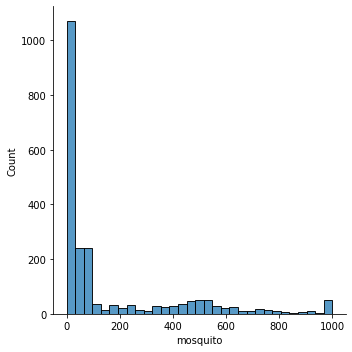

In [19]:
import seaborn as sns

# 타겟 분포가 right(positively) skewed 되어 있네요!
sns.displot(mosquito['mosquito'])

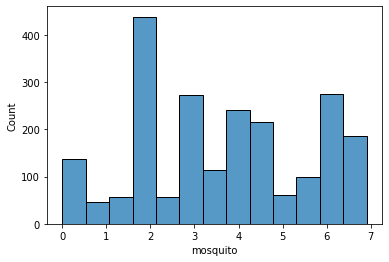

In [20]:
import numpy as np

sns.histplot(np.log1p(mosquito['mosquito']))

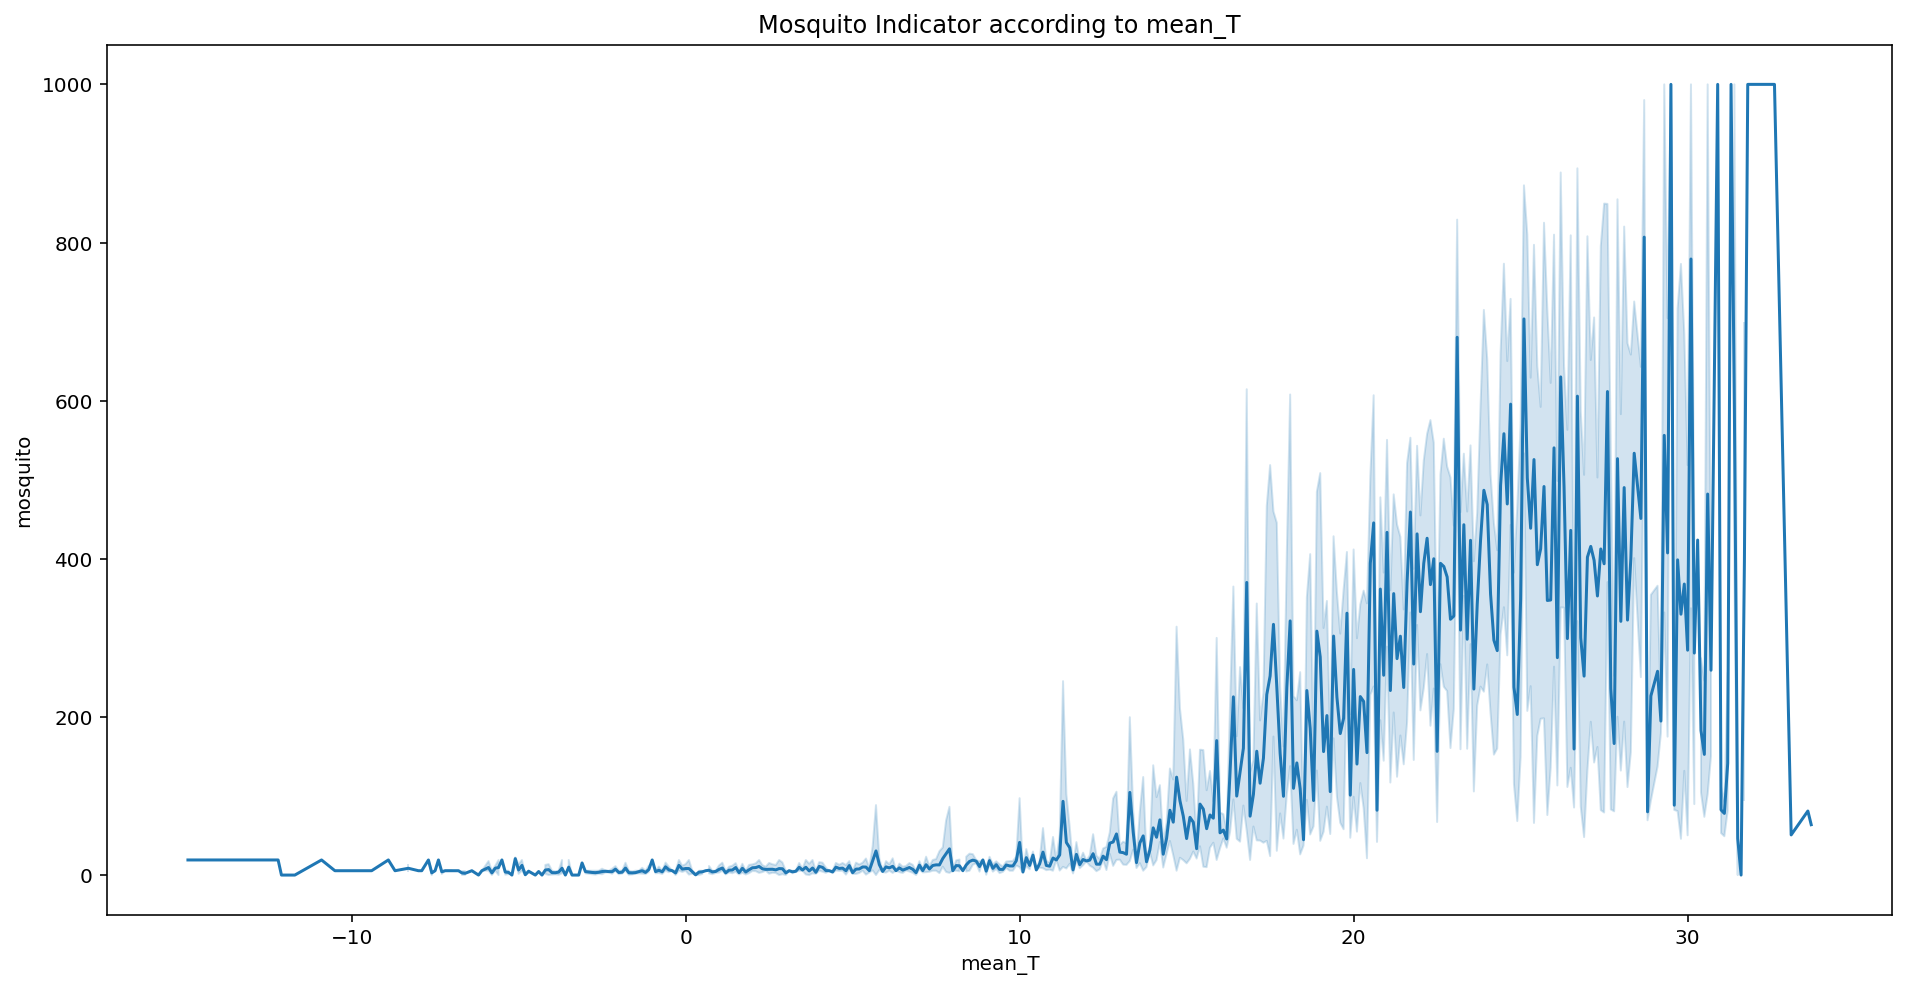

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
sns.lineplot(data=mosquito, x="mean_T", y="mosquito")
plt.title('Mosquito Indicator according to mean_T')
plt.show()

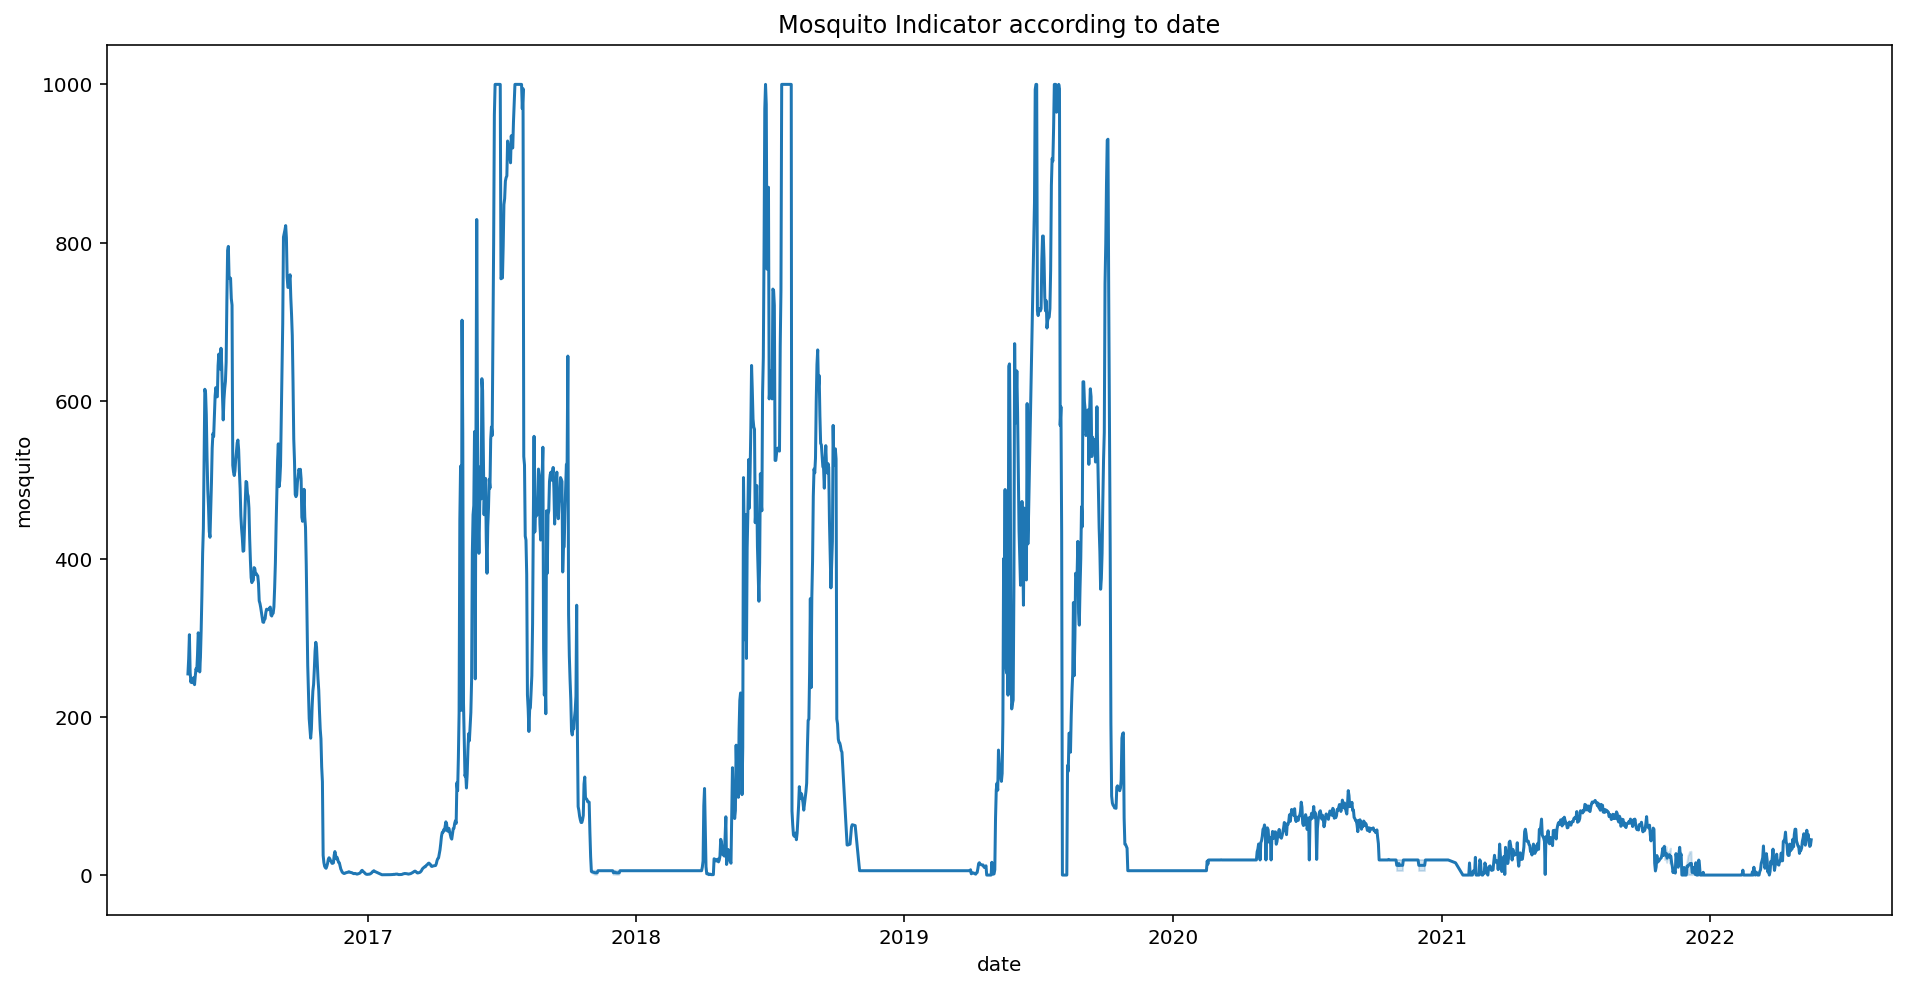

In [148]:
plt.figure(figsize=(16,8))
mosquito['date'] = pd.to_datetime(mosquito['date'])
sns.lineplot(data=mosquito, x="date", y="mosquito")
plt.title('Mosquito Indicator according to date')
plt.show()

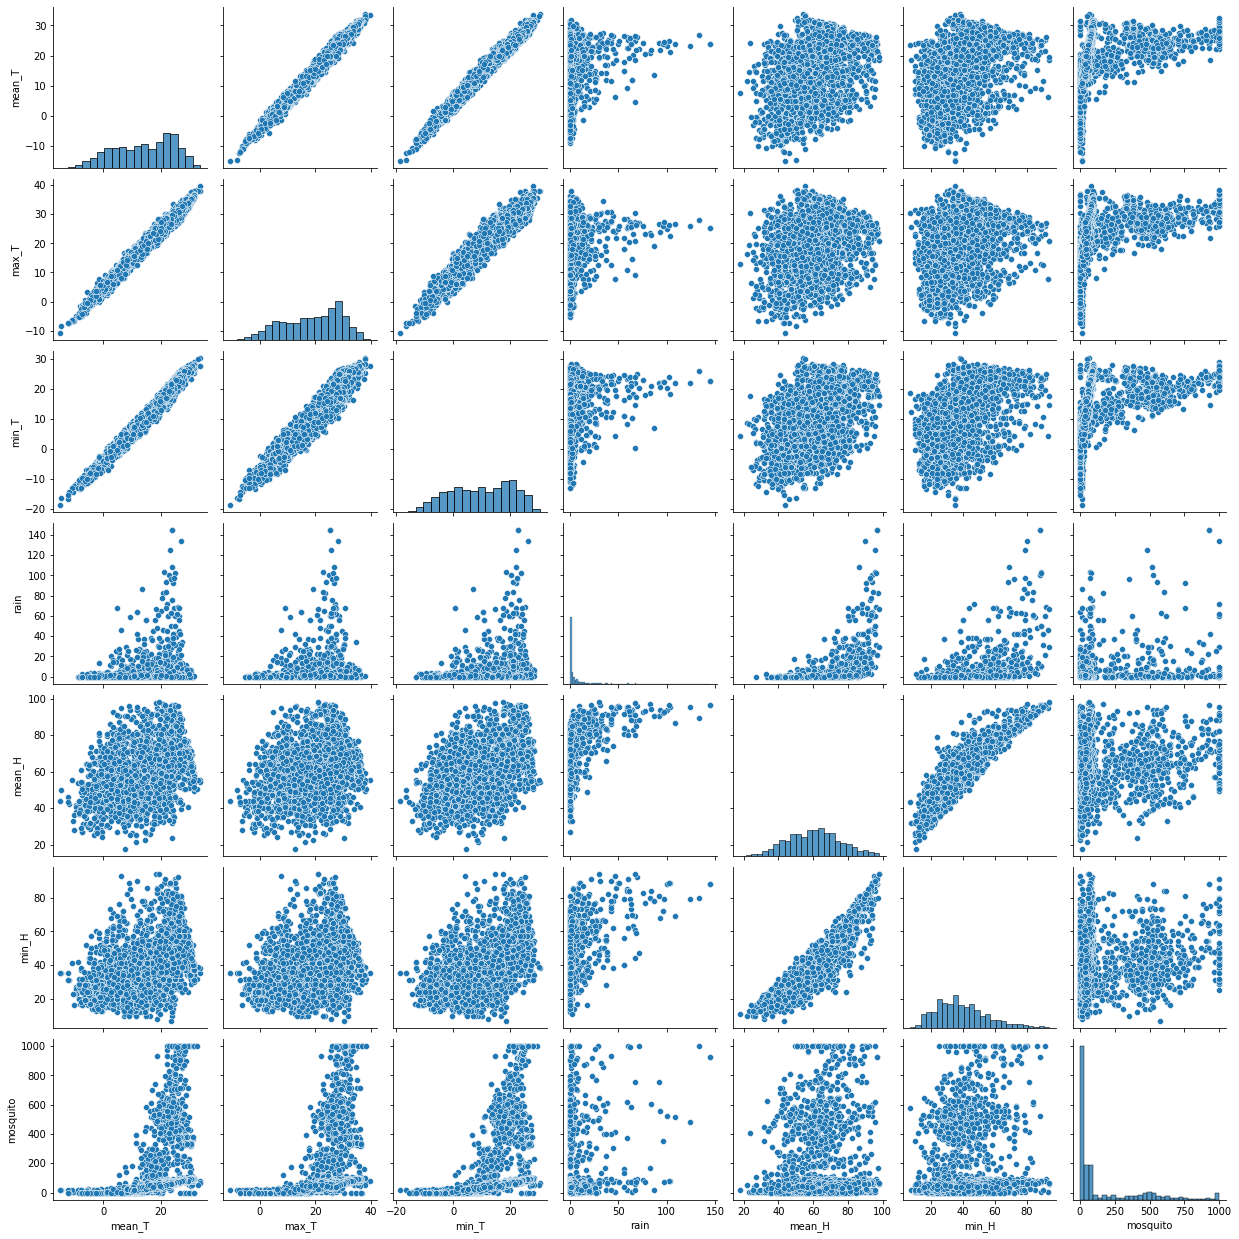

In [23]:
sns.pairplot(mosquito)

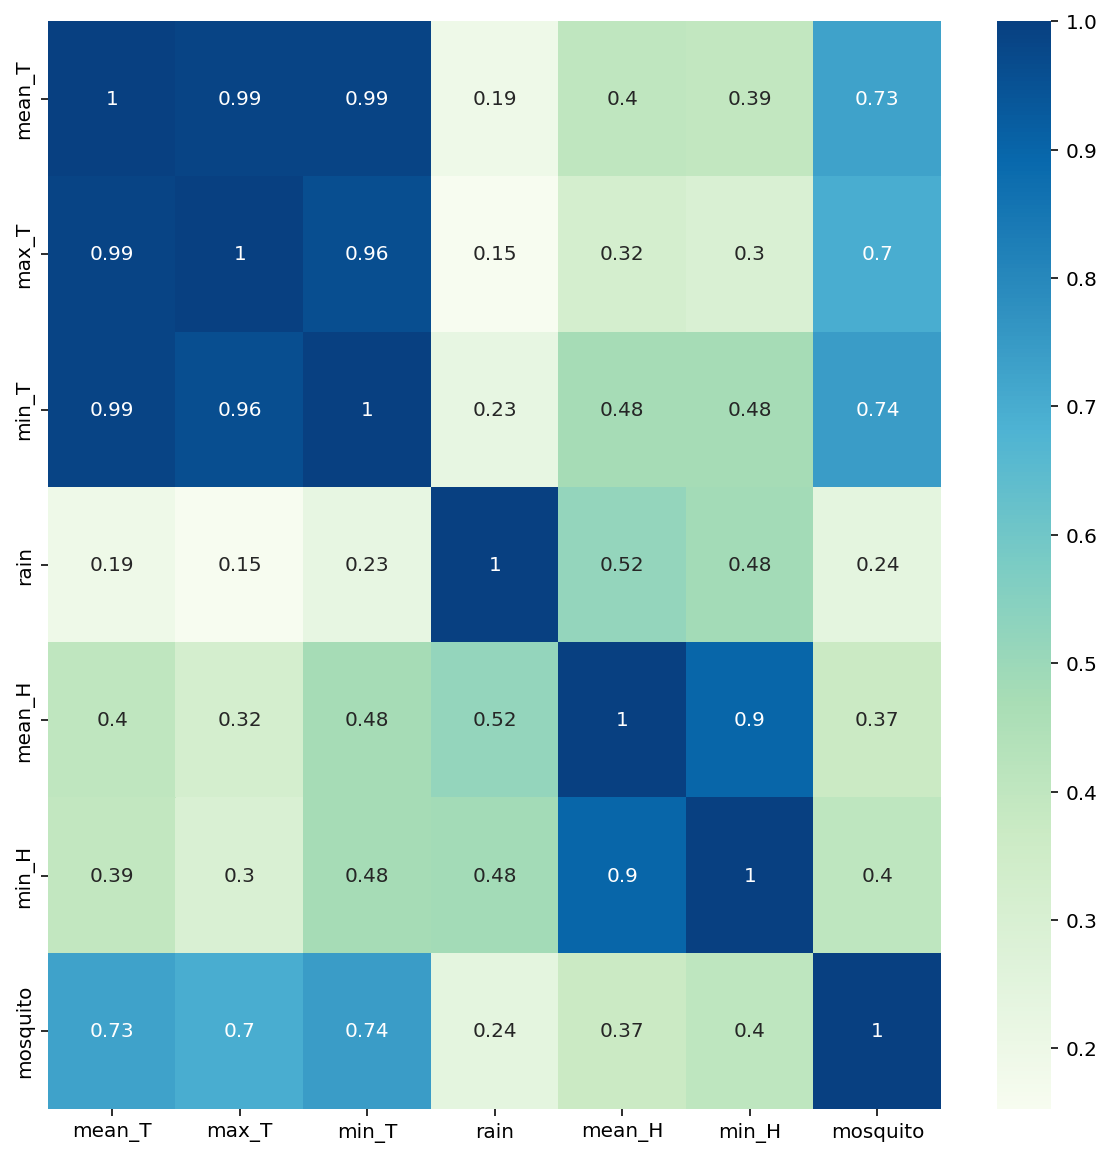

In [149]:
#Calculating Correlation
corr=mosquito[mosquito['date']<='2019-12-31'].corr()

#Plotting Correlation
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="GnBu")

### 훈련/검증/테스트 데이터 만들기

In [28]:
## 2019년을 기준으로 컷
mosquito['date'] = pd.to_datetime(mosquito['date'])
cutOff = pd.to_datetime('2019-01-01')
train = mosquito[mosquito['date'] < cutOff]
test = mosquito[mosquito['date'] >= cutOff]

In [29]:
train.shape, test.shape

((957, 8), (1245, 8))

In [30]:
train.head()

,date,mean_T,max_T,min_T,rain,mean_H,min_H,mosquito
0,2016-05-01,18.8,26.0,12.2,NaN,40.5,16.0,254.4
1,2016-05-02,21.1,28.4,16.5,16.5,64.5,33.0,273.5
2,2016-05-03,12.9,17.6,8.9,27.0,86.1,72.0,304.0
3,2016-05-04,15.7,20.6,10.2,NaN,46.6,28.0,256.2
4,2016-05-05,18.9,26.9,10.2,7.5,50.8,17.0,243.8


In [31]:
def engineer_features(X):
    
    X = X.copy()

    # 강수량 결측치 0으로 대체
    X['rain'] = X['rain'].fillna(0)

    # 이상값 제거
    X = X[X['date'] <= '2019-12-31']

    return X

train = engineer_features(train)
test = engineer_features(test)

In [32]:
train.shape, test.shape

((957, 8), (359, 8))

In [33]:
train.head()

,date,mean_T,max_T,min_T,rain,mean_H,min_H,mosquito
0,2016-05-01,18.8,26.0,12.2,0.0,40.5,16.0,254.4
1,2016-05-02,21.1,28.4,16.5,16.5,64.5,33.0,273.5
2,2016-05-03,12.9,17.6,8.9,27.0,86.1,72.0,304.0
3,2016-05-04,15.7,20.6,10.2,0.0,46.6,28.0,256.2
4,2016-05-05,18.9,26.9,10.2,7.5,50.8,17.0,243.8


In [34]:
train.isnull().sum()

date        0
mean_T      0
max_T       1
min_T       0
rain        0
mean_H      0
min_H       1
mosquito    0
dtype: int64

## MODEL

### 기준모델
---
회귀 문제이기 접근하기에 기준모델을 Target의 평균값으로 설정하였다.

따라서 타겟인 **'mosquito'의 평균**을 기준모델로 사용하였습니다.

In [35]:
train['mosquito'].mean()

261.99623824451425

In [36]:
target = 'mosquito'

y_train = train[target]
y_test = test[target]

In [37]:
predict = y_train.mean()

In [38]:
predict # 기준모델

261.99623824451425

### 평가지표
---
회귀 모델의 평가지표는 MSE, MAE, RMSE, R^2로 성능을 측정합니다.

In [39]:
# 기준모델로 훈련 에러(MAE) 계산
from sklearn.metrics import mean_absolute_error
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러: {mae:.2f}')

훈련 에러: 254.72


In [40]:
# 테스트 에러(MAE)
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 267.10


In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

features = ['mean_T']
X_train = train[features]
X_test = test[features]

# 모델 fit
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 155.93


In [42]:
# 테스트 데이터에 적용
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 163.07


In [43]:
# 다중모델 학습을 위한 특성
features = ['mean_T', 'min_T']
X_train = train[features]
X_test = test[features]

In [44]:
# 모델 fit
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 152.42


In [45]:
# 테스트 데이터에 적용해 봅시다 
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 154.09


### 모델


In [50]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 3.7 MB/s 


In [46]:
from sklearn.model_selection import train_test_split

target = ['mosquito']
features = ['mean_T', 'min_T', 'max_T', 'rain', 'mean_H', 'min_H']

train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=2)

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [47]:
train.shape, val.shape

((765, 8), (192, 8))

In [48]:
features = ['mean_T', 'min_T', 'max_T', 'rain', 'mean_H']
X_train = train[features]
X_val = val[features]
X_test = test[features]

##### 랜덤포레스트

In [86]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
import numpy as np

model = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    RandomForestRegressor(random_state=2)
)

tt = TransformedTargetRegressor(regressor=model,
                                func=np.log1p, inverse_func=np.expm1)

tt.fit(X_train, y_train)
tt.score(X_val, y_val)

0.6449056249613645

In [84]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = tt.predict(X_test)

print('MSE : ', mean_squared_error(y_test,y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('RMSE : ', mean_squared_error(y_test, y_pred)**0.5)
print('R2 : ', r2_score(y_test, y_pred))

MSE :  34175.90012046092
MAE :  99.83140543667577
RMSE :  184.86724999431598
R2 :  0.6117042342212892


##### 그라디언트부스트

In [80]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor
import numpy as np

model = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    GradientBoostingRegressor(random_state=2)
)

tt = TransformedTargetRegressor(regressor=model,
                                func=np.log1p, inverse_func=np.expm1)

tt.fit(X_train, y_train)
tt.score(X_val, y_val)

0.6529605498131686

In [82]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = tt.predict(X_test)

print('MSE : ', mean_squared_error(y_test,y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('RMSE : ', mean_squared_error(y_test, y_pred)**0.5)
print('R2 : ', r2_score(y_test, y_pred))

MSE :  30433.829014363884
MAE :  95.23853500488885
RMSE :  174.4529421201141
R2 :  0.6542204623416545


##### XGB

In [78]:
from xgboost import XGBRegressor
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
import numpy as np

model = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(strategy='mean'),
    XGBRegressor(objective='reg:squarederror',random_state=2)
)

tt = TransformedTargetRegressor(regressor=model,
                                func=np.log1p, inverse_func=np.expm1)

tt.fit(X_train, y_train)
tt.score(X_val, y_val)

0.6556988866623855

In [79]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = tt.predict(X_test)

print('MSE : ', mean_squared_error(y_test,y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('RMSE : ', mean_squared_error(y_test, y_pred)**0.5)
print('R2 : ', r2_score(y_test, y_pred))

MSE :  30411.475748894514
MAE :  96.0955106789023
RMSE :  174.38886360342656
R2 :  0.654474433072564


#### 하이퍼파라미터 튜닝

In [121]:
from xgboost import XGBRegressor
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

model = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    XGBRegressor(objective='reg:squarederror',
                 learning_rate =0.1,
                 gamma=0,
                 subsample=0.8,
                 colsample_bytree=0.8,
                 nthread=-1,
                 scale_pos_weight=1,
                 random_state=42)
)

dists = {
    'simpleimputer__strategy': ['mean', 'median'],
    'xgbregressor__n_estimators': randint(10,500),
    'xgbregressor__max_depth':range(4,10,1),
    'xgbregressor__min_child_weight':range(1,6,2)
}

clf = RandomizedSearchCV(
    model, 
    param_distributions=dists, 
    n_iter=50, 
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('xgbregressor',
                                              XGBRegressor(colsample_bytree=0.8,
                                                           nthread=-1,
                                                           objective='reg:squarederror',
                                                           random_state=42,
                                                           subsample=0.8))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'simpleimputer__strategy': ['mean',
                                                                    'median'],
                                        'xgbregressor__max_depth': range(4, 10),
                                        'xgbregressor__min_child_weight': range

In [122]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'simpleimputer__strategy': 'median', 'xgbregressor__max_depth': 4, 'xgbregressor__min_child_weight': 5, 'xgbregressor__n_estimators': 28}
MAE:  100.4927077110141


In [123]:
pipe = clf.best_estimator_

tt = TransformedTargetRegressor(regressor=pipe,
                                func=np.log1p, inverse_func=np.expm1)

tt.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('onehotencoder',
                                                      OneHotEncoder(cols=[])),
                                                     ('simpleimputer',
                                                      SimpleImputer(strategy='median')),
                                                     ('xgbregressor',
                                                      XGBRegressor(colsample_bytree=0.8,
                                                                   max_depth=4,
                                                                   min_child_weight=5,
                                                                   n_estimators=28,
                                                                   nthread=-1,
                                                                   objective='reg:squarederror',
                         

In [124]:
from sklearn.metrics import mean_absolute_error

y_pred = clf.predict(X_test)

print('MSE : ', mean_squared_error(y_test,y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('RMSE : ', mean_squared_error(y_test, y_pred)**0.5)
print('R2 : ', r2_score(y_test, y_pred))

MSE :  28323.757336103106
MAE :  95.02370662768902
RMSE :  168.29663495181092
R2 :  0.678194429238512


### 해석

In [57]:
pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 181 kB/s 
     |████████████████████████████████| 13.1 MB 41.5 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=586b1f3190e5cd03f687d643b58d56f01d2fad796983dc2f7a0ca3f21d3b66b7
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


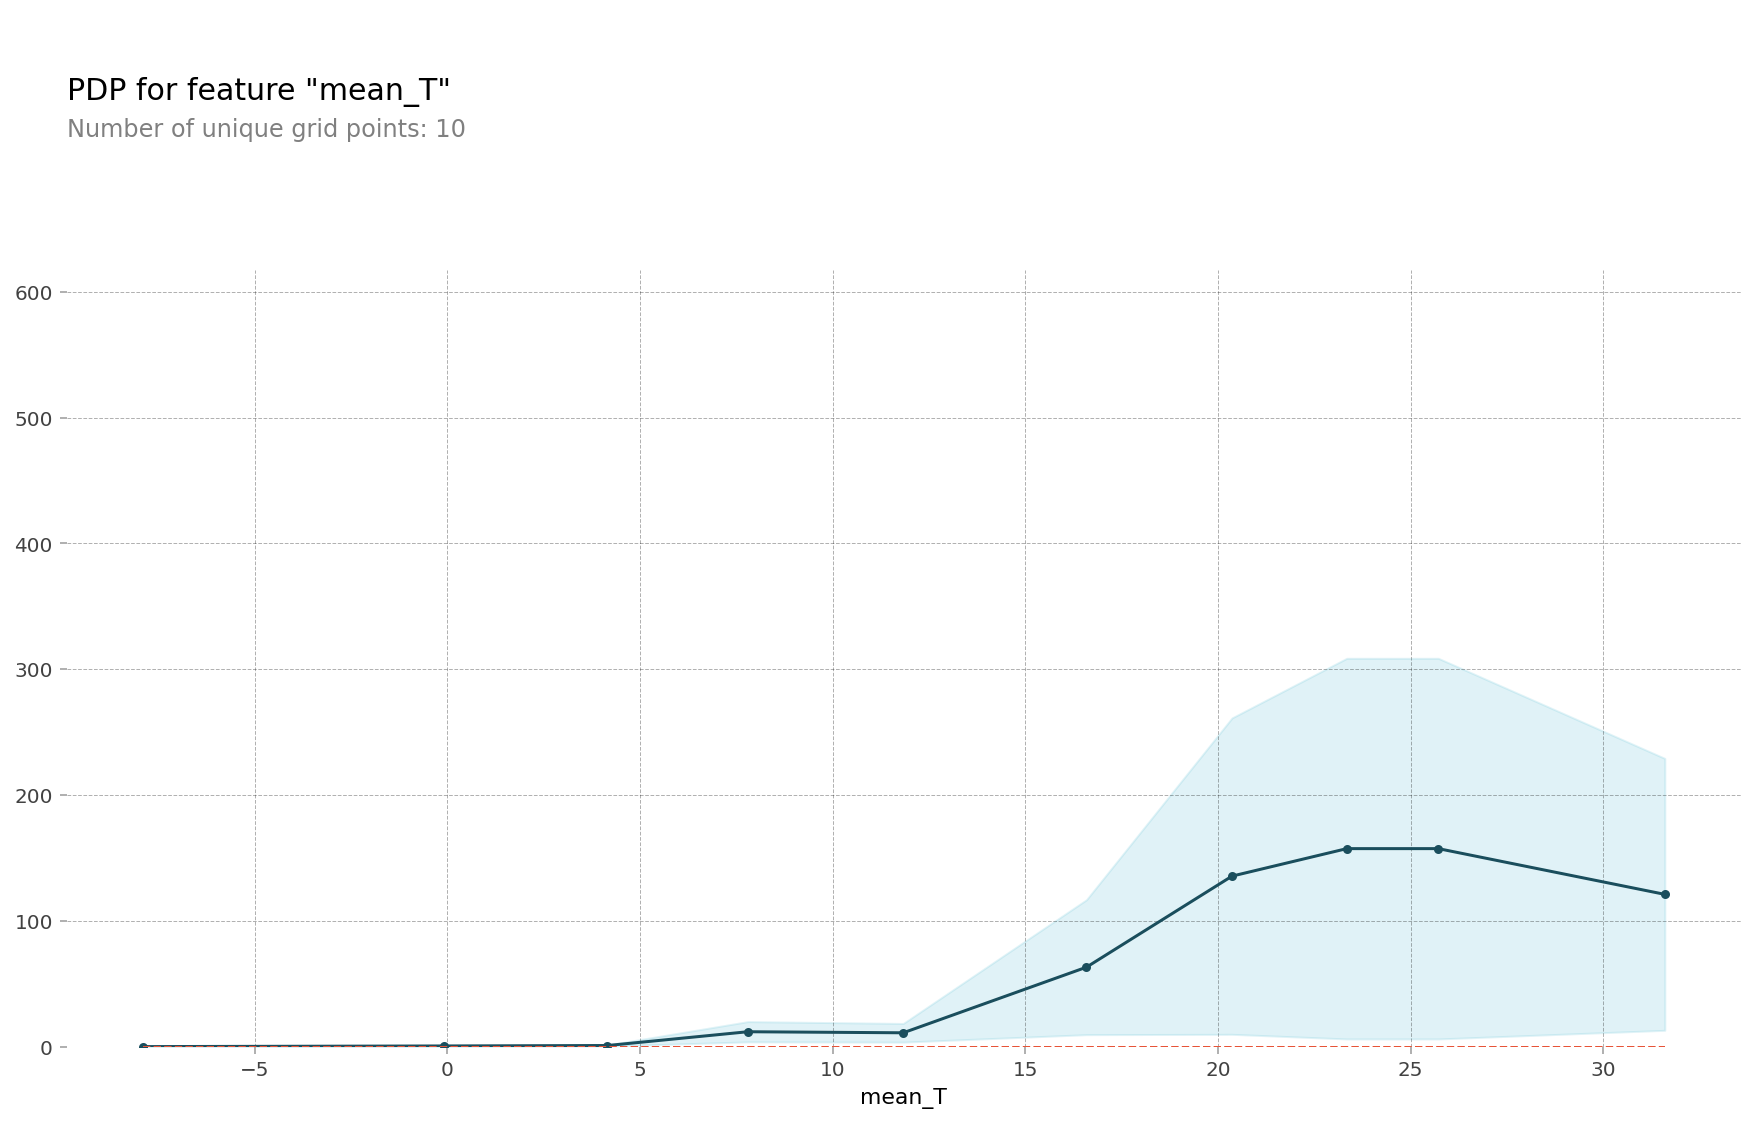

In [125]:
import matplotlib.pyplot as plt
from pdpbox.pdp import pdp_isolate, pdp_plot

plt.rcParams['figure.dpi'] = 144

feature = 'mean_T'

isolated = pdp_isolate(
    model=tt, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)
pdp_plot(isolated, feature_name=feature);

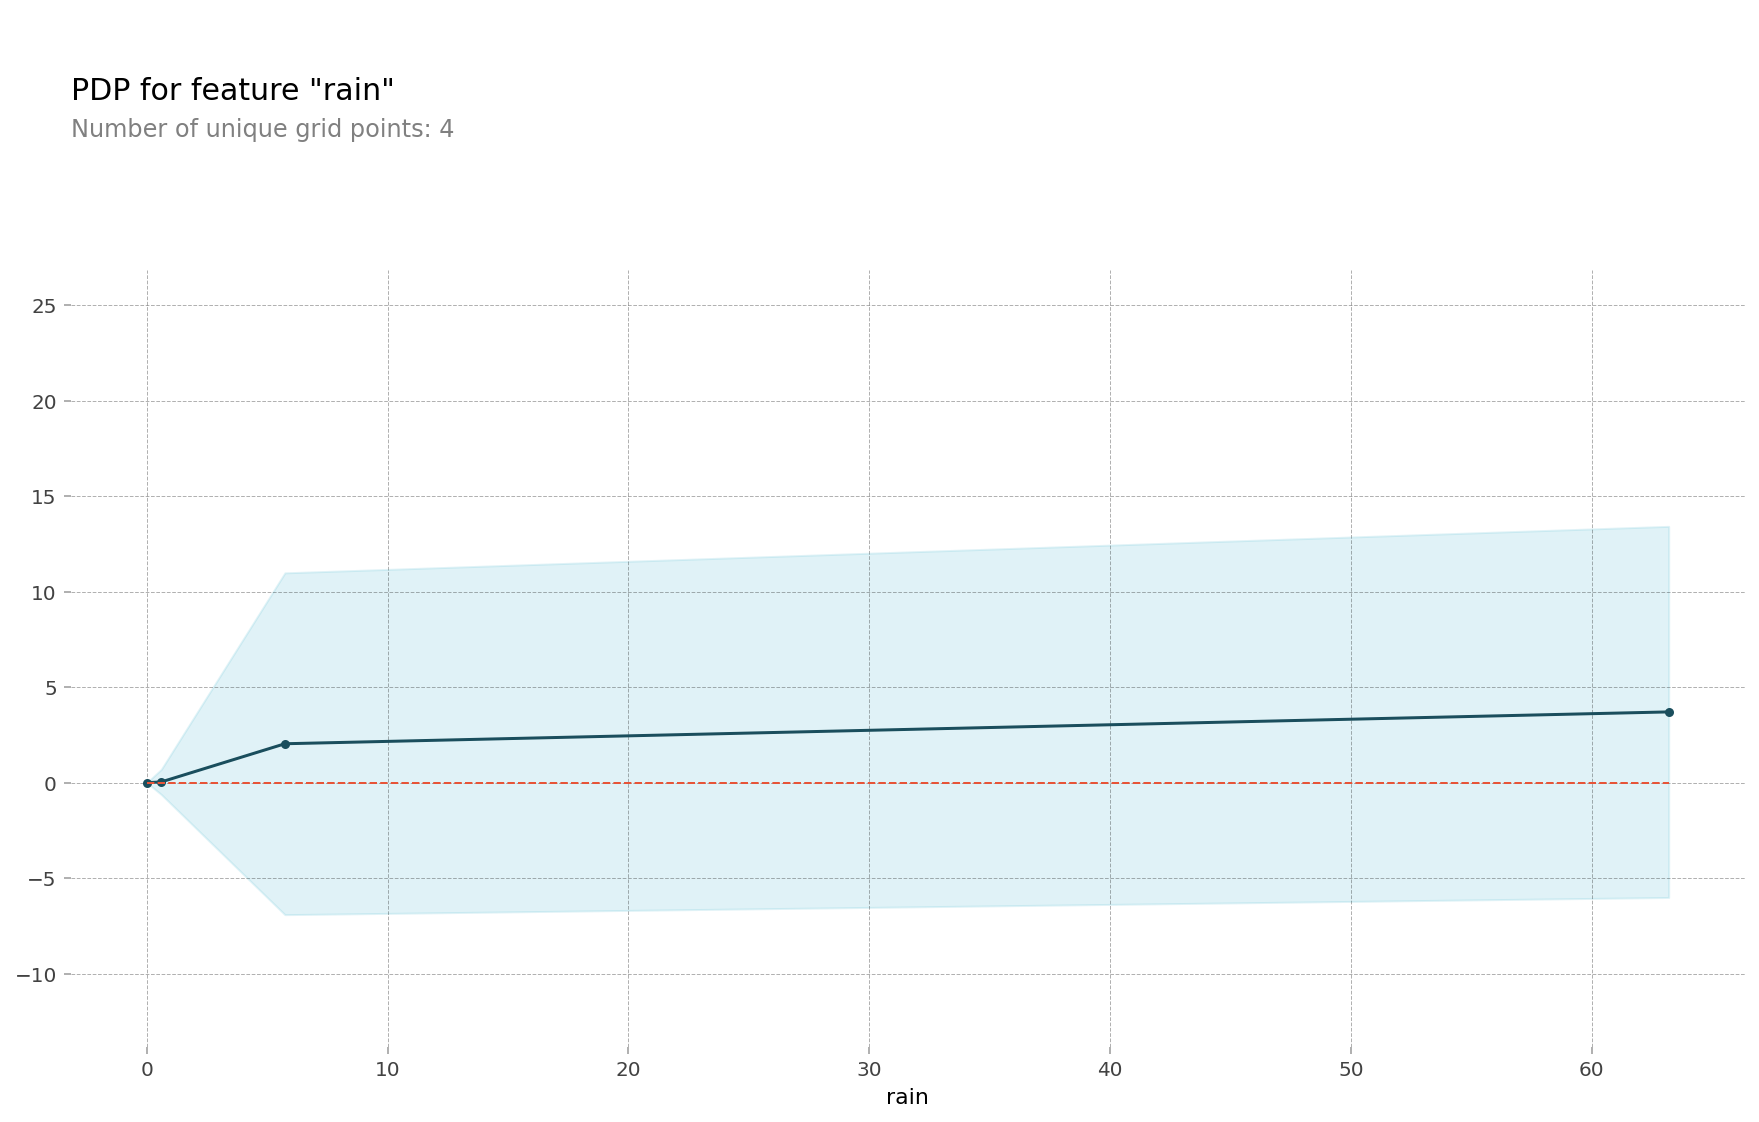

In [126]:
feature = 'rain'

isolated = pdp_isolate(
    model=tt, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)
pdp_plot(isolated, feature_name=feature);

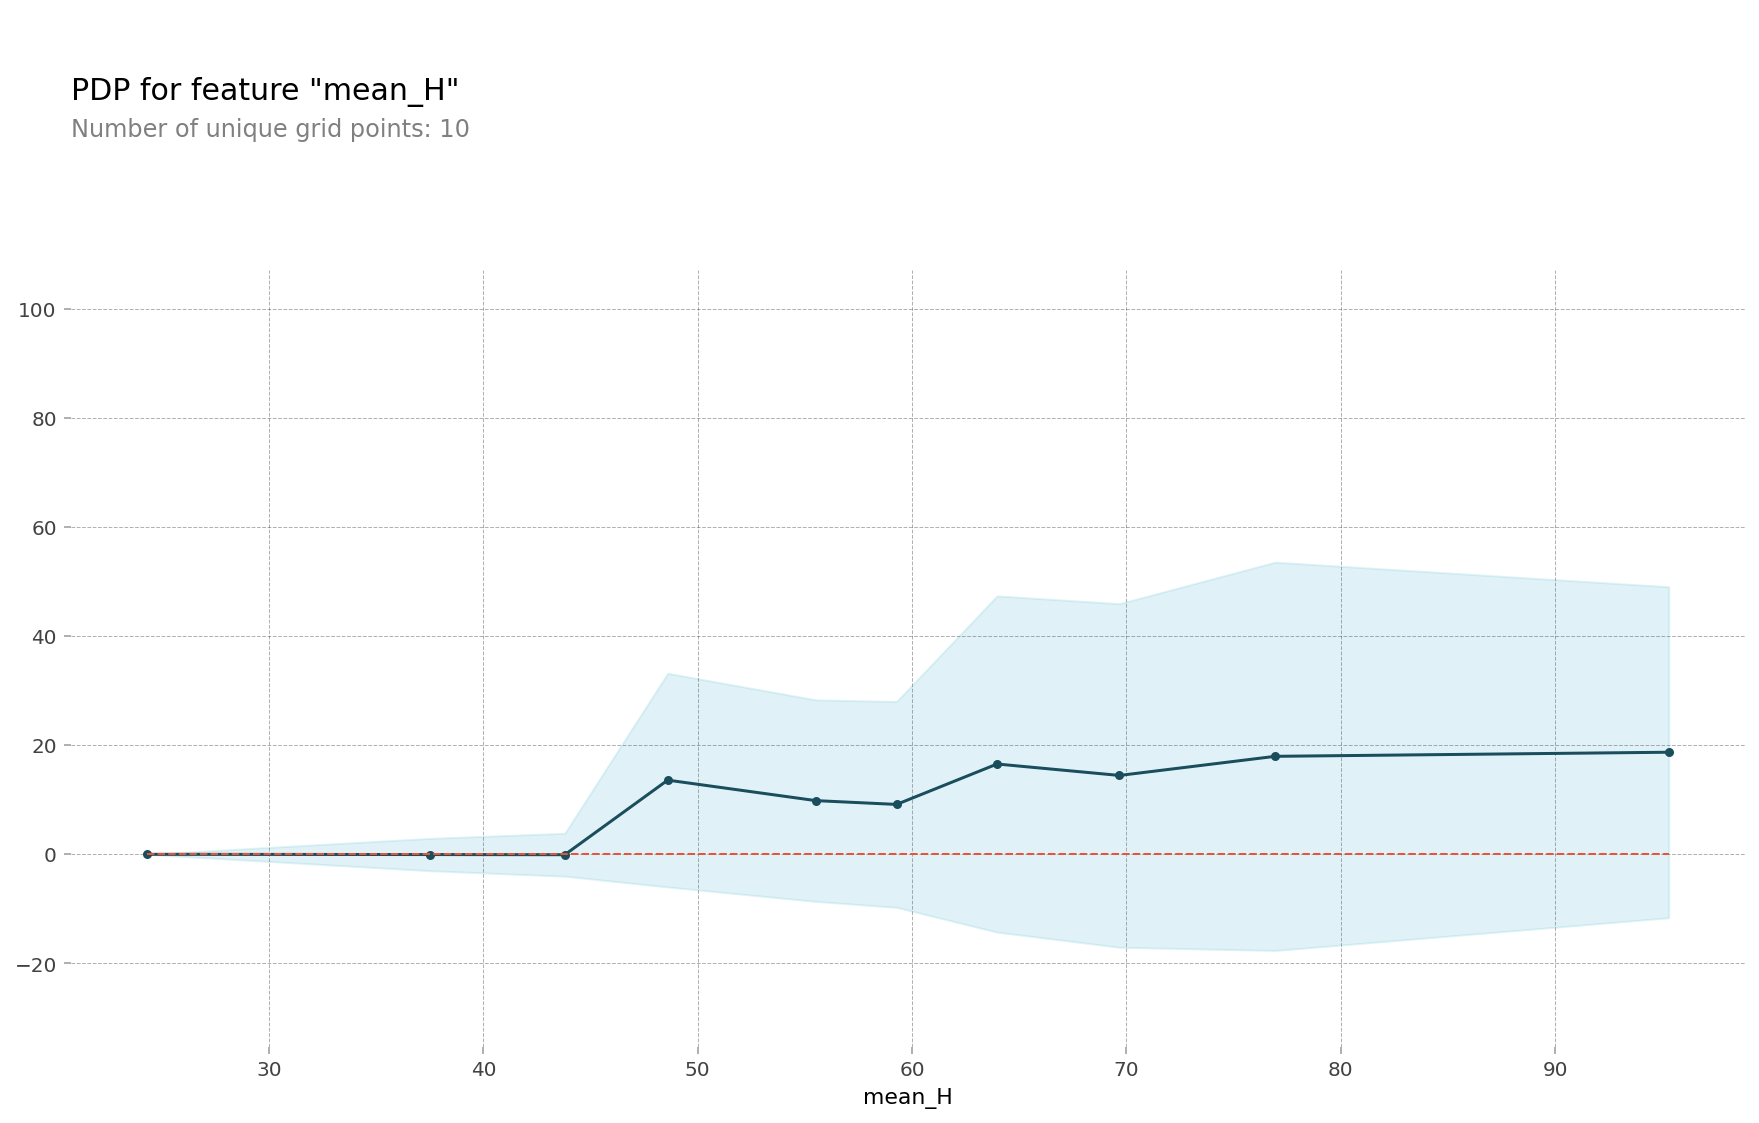

In [127]:
feature = 'mean_H'

isolated = pdp_isolate(
    model=tt, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)
pdp_plot(isolated, feature_name=feature);